In [8]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

In [10]:
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [11]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

============== 1/3 ==============
epoch:0 | 0.097 - 0.093
epoch:1 | 0.117 - 0.367
epoch:2 | 0.117 - 0.664
epoch:3 | 0.117 - 0.777
epoch:4 | 0.116 - 0.835
epoch:5 | 0.117 - 0.892
epoch:6 | 0.117 - 0.923
epoch:7 | 0.117 - 0.942
epoch:8 | 0.117 - 0.977
epoch:9 | 0.117 - 0.983
epoch:10 | 0.117 - 0.986
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.993
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 1.0
============== 2/3 ==============
epoch:0 | 0.096 - 0.119
epoch:1 | 0.218 - 0.139
epoch:2 | 0.318 - 0.274
epoch:3 | 0.442 - 0.451
epoch:4 | 0.524 - 0.563
epoch:5 | 0.549 - 0.66
epoch:6 | 0.594 - 0.714
epoch:7 | 0.638 - 0.765
epoch:8 | 0.678 - 0.802
epoch:9 | 0.717 - 0.837
epoch:10 | 0.745 - 0.848
epoch:11 | 0.768 - 0.872
epoch:12 | 0.788 - 0.883
epoch:13 | 0.801 - 0.901
epoch:14 | 0.817 - 0.914
epoch:15 | 0.836 - 0.914
epoch:16 | 0.843 - 0.923
epoch:17 | 0.848 - 0.926
epoch:18 | 0.854 - 0.934


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.862 - 0.931
============== 3/3 ==============
epoch:0 | 0.059 - 0.073
epoch:1 | 0.073 - 0.192
epoch:2 | 0.079 - 0.415
epoch:3 | 0.094 - 0.627
epoch:4 | 0.099 - 0.723
epoch:5 | 0.119 - 0.79
epoch:6 | 0.141 - 0.823
epoch:7 | 0.173 - 0.856
epoch:8 | 0.202 - 0.875
epoch:9 | 0.229 - 0.893
epoch:10 | 0.253 - 0.906
epoch:11 | 0.266 - 0.92
epoch:12 | 0.283 - 0.935
epoch:13 | 0.301 - 0.937
epoch:14 | 0.32 - 0.945
epoch:15 | 0.338 - 0.955
epoch:16 | 0.349 - 0.959
epoch:17 | 0.378 - 0.963
epoch:18 | 0.389 - 0.969


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.387 - 0.969


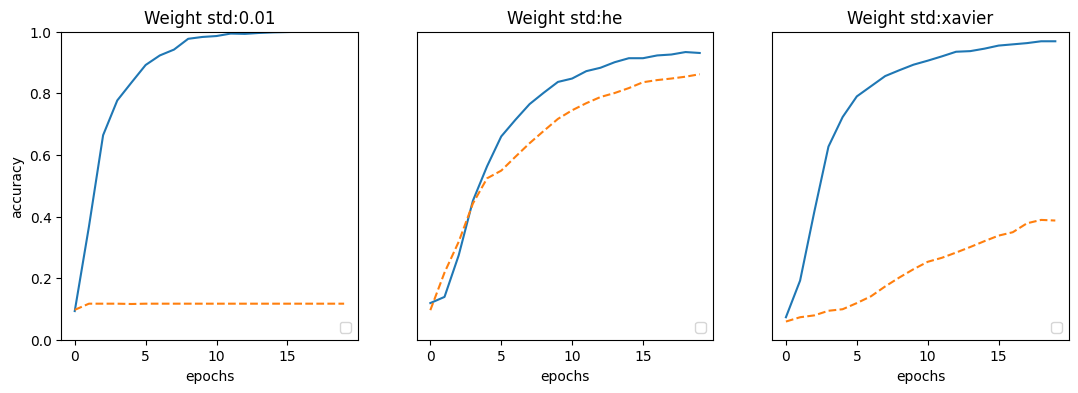

In [18]:
# weight_scale_list = np.logspace(0, -4, num=16)
weight_scale_list = [.01,'he','xavier']
x = np.arange(max_epochs)
plt.figure(figsize=(13, 4))
for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/3" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(1, 3, i+1)
    plt.title("Weight std:" + str(w))
    if i == 4:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 3:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    # if i < 4:
    #     plt.xticks([])
    # else:
    plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()